In [1]:
library(tidyverse)
library(cowplot)
library(martini)
library(blur)

gene2snp <- read_tsv("../../data/genesis/snp2hgnc.tsv", col_types = "cc")
load("../../data/genesis/gi.net")
load("../../data/genesis/genesis.RData")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# GS network

In [2]:
gs <- read_tsv("cones.evo.chi2.consistency.additive.gs.tsv", 
               col_types = "ciiiccdli")
sum(gs$selected)

[1] 1248

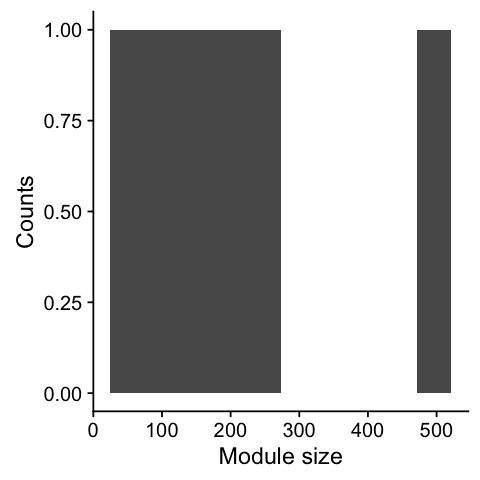

In [3]:
options(repr.plot.width=4, repr.plot.height=4)
module_size(gs)

In [4]:
head(gs)

snp,chr,cm,pos,allele.1,allele.2,c,selected,module
rs1221063,23,0,62542316,C,T,NaN,FALSE,NA
rs4543711,23,0,52846508,A,G,3.334516320,FALSE,NA
rs2806844,23,0,52860079,G,A,4.006483114,FALSE,NA
rs5991840,23,0,52951462,G,A,1.073690534,FALSE,NA
rs5991839,23,0,52951735,C,T,0.007915999,FALSE,NA
rs5951164,23,0,53004364,T,C,3.549682649,FALSE,NA


Most of the clusters have small sizes (1,2 SNPs). However, it seems that small clusters have a similar association scores as bigger clusters, so I am inclined to think that bigger clusters are not picked despite being having lower association scores, but because they happen to connect high-score SNPs.

In [5]:
blur:::compute_mod_size(gs)

module,chr,size,C
5,3,478,NA
2,8,272,NA
4,5,190,NA
3,10,161,NA
1,16,116,NA
6,10,31,15.70936


It seems that the biggest clusters come from only 3 chromosomic regions in chromosomes 3, 5 and 8.

[1] TRUE

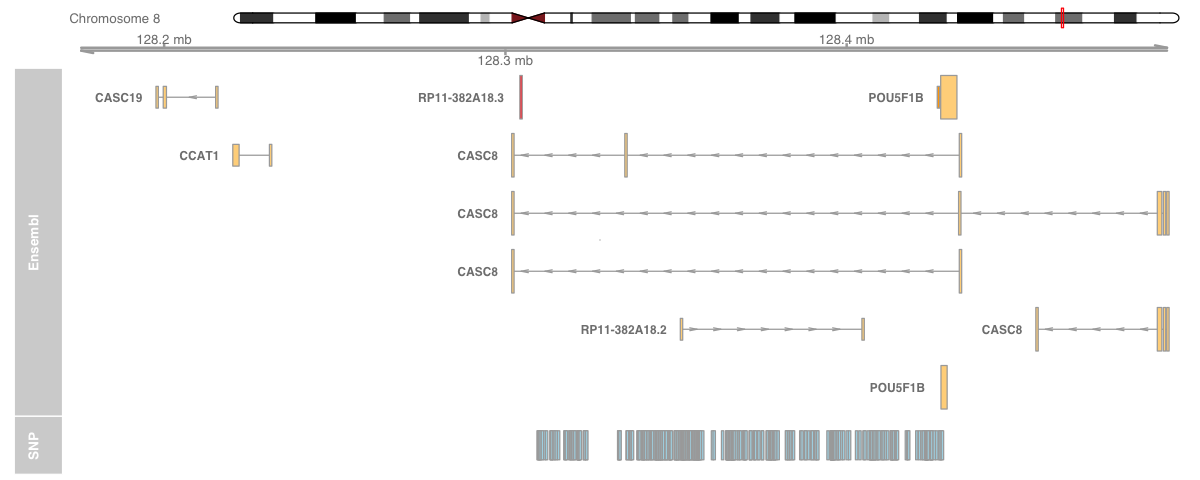

In [6]:
options(repr.plot.width=10, repr.plot.height=4)
k <- blur:::compute_mod_size(gs) %>% filter(chr == 8) %>% .$module %>% head(n = 20)
plot_snp_module(gs, k)

In chromosome 8 we find gene CASC8, which had appreared in previous analyses.

[1] TRUE

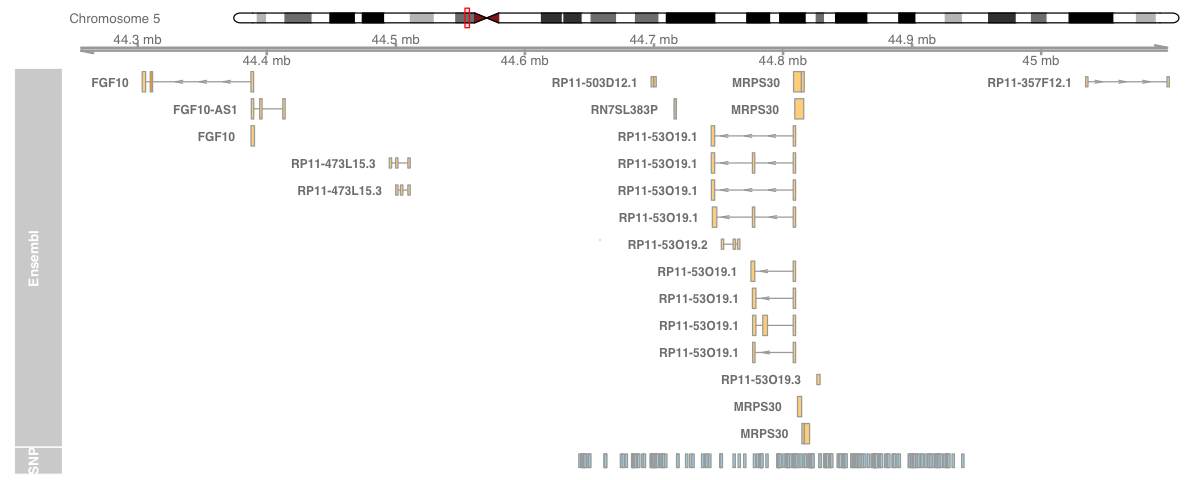

In [7]:
options(repr.plot.width=10, repr.plot.height=4)
k <- blur:::compute_mod_size(gs) %>% filter(chr == 5) %>% .$module %>% head(n = 20)
plot_snp_module(gs, k)

In this region we find two compelling genes: MRPS30, the S30 subunit of the mitochondrial ribosome and potentially involved in energetic metabolism; and, more interestingly, RP11-53O19.1, also known as Breast Cancer-Associated Transcript 54, a ncRNA.

[1] TRUE

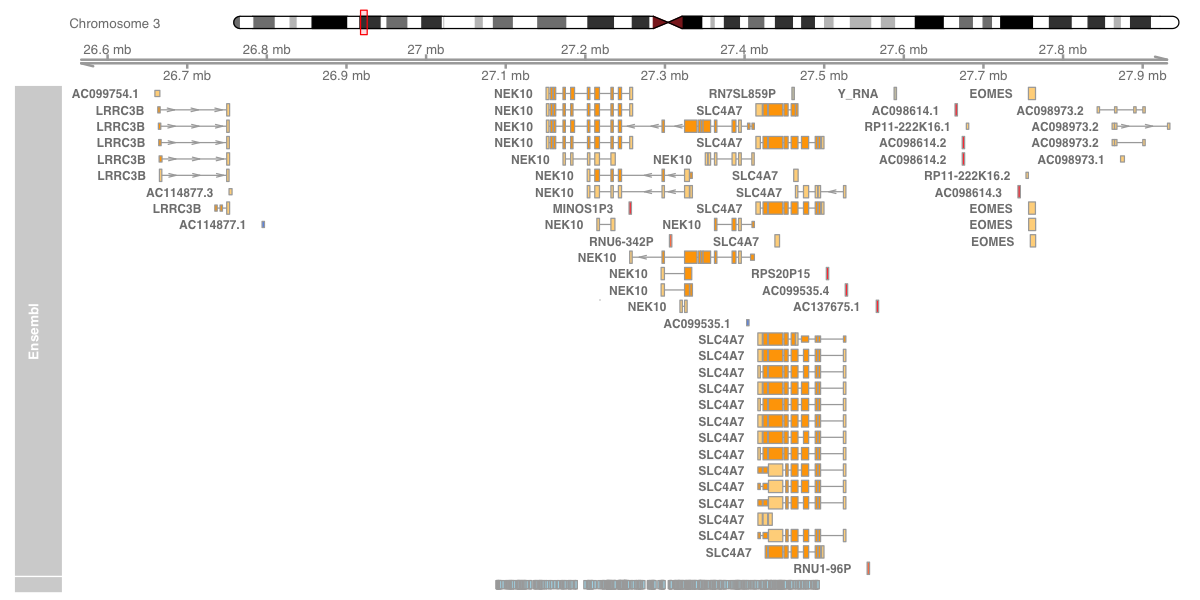

In [8]:
options(repr.plot.width=10, repr.plot.height=5)
k <- blur:::compute_mod_size(gs) %>% filter(chr == 3) %>% .$module %>% head(n = 20)
plot_snp_module(gs, k)

Here we retrieve our old-friend NEK10, a protein kinase involved in cell-cycle controlwhich was already linked to BRCA susceptibility.

## Genes affected

In [9]:
table_regions(gs, net)

region,module,coords,bestSnp,genes,numSnps
3p24.1,5,27089482-27492187,rs6787882,"NEK10,SLC4A7",478 (189)
5p12,4,44642670-44939293,rs930395,"LOC100506674,MRPS30",190 (154)
8q24.21,2,128309591-128428061,rs9693995,"CASC21,CASC8,CCAT2",272 (0)
10q26.13,3,123296158-123441192,rs2981579,FGFR2,161 (98)
10q24.1,6,98838694-98896779,rs2817687,SLIT1,31 (0)
16q12.1,1,52525285-52587375,rs12918816,"CASC16,TOX3",58 (8)
16q12.2,1,52600447-52651714,rs12922061,CASC16,58 (7)


When we don't focus on clusters, but try to see signal provided by any selected SNPs we give voice to these SNPs with an association strongly associated enough to be selected without a cluster. Like this, we recover our old friend FGFR2, a tumor suppressor gene that is amplified and overexpressed in breast cancer.

[1] TRUE

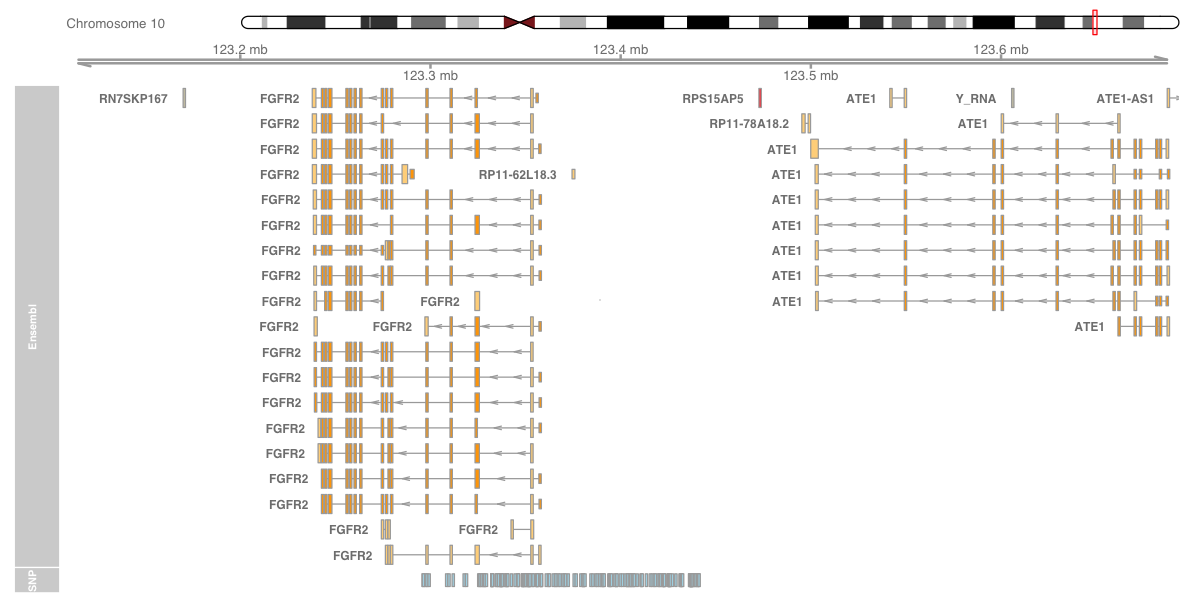

In [10]:
options(repr.plot.width=10, repr.plot.height=5)
# FGFR2 SNPs
k <- gs %>% filter(selected & chr == 10 & pos > 123296158 & pos < 123357561) %>% .$module
plot_snp_module(gs, k)

TOX3, related with ER+ BRCA, and CASC16, really close in the genome also pop up in the analysis.

[1] TRUE

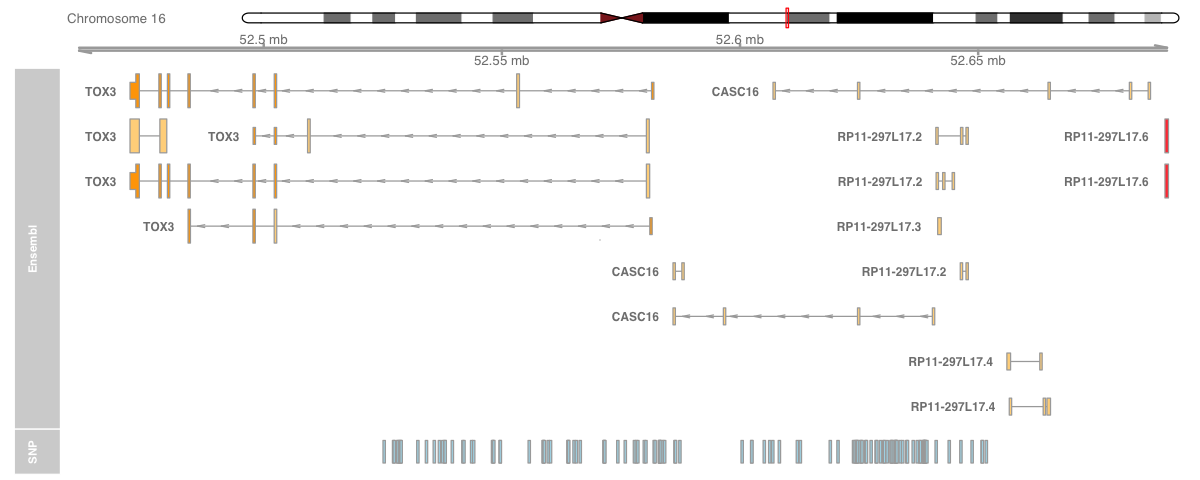

In [11]:
options(repr.plot.width=10, repr.plot.height=4)
# TOX3 SNPs
k <- gs %>% filter(selected & chr == 16 & pos > 52525285 & pos < 52639236) %>% .$module
plot_snp_module(gs, k)

# GM network

In [12]:
gm <- read_tsv("cones.evo.chi2.consistency.additive.gm.tsv", 
               col_types = "ciiiccdli")
sum(gm$selected)

[1] 1091

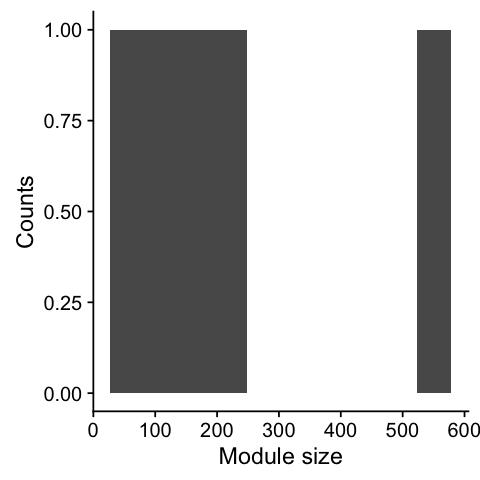

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
module_size(gm)

In [14]:
blur:::compute_mod_size(gm)

module,chr,size,C
5,3,537,NA
3,10,206,NA
4,5,190,NA
2,16,117,NA
1,10,41,14.10633


Only 2 chromosomic regions here, in chromosomes 3 and 5, around the regions we already described.

[1] TRUE

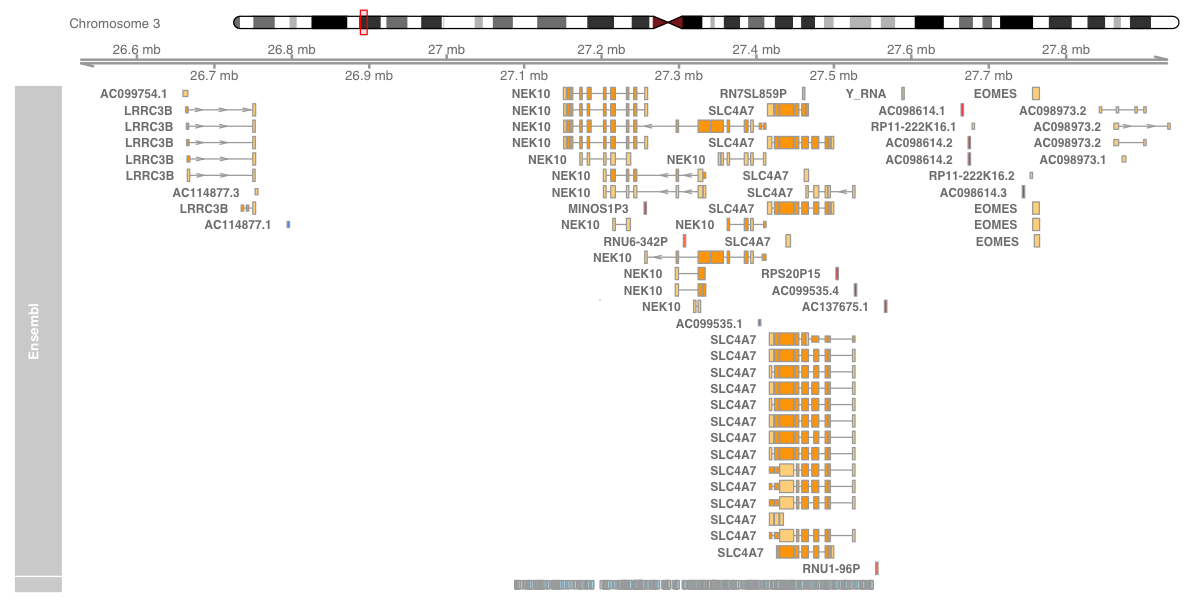

In [15]:
options(repr.plot.width=10, repr.plot.height=5)
k <- blur:::compute_mod_size(gm) %>% filter(chr == 3) %>% .$module %>% head(n = 20)
plot_snp_module(gm, k)

[1] TRUE

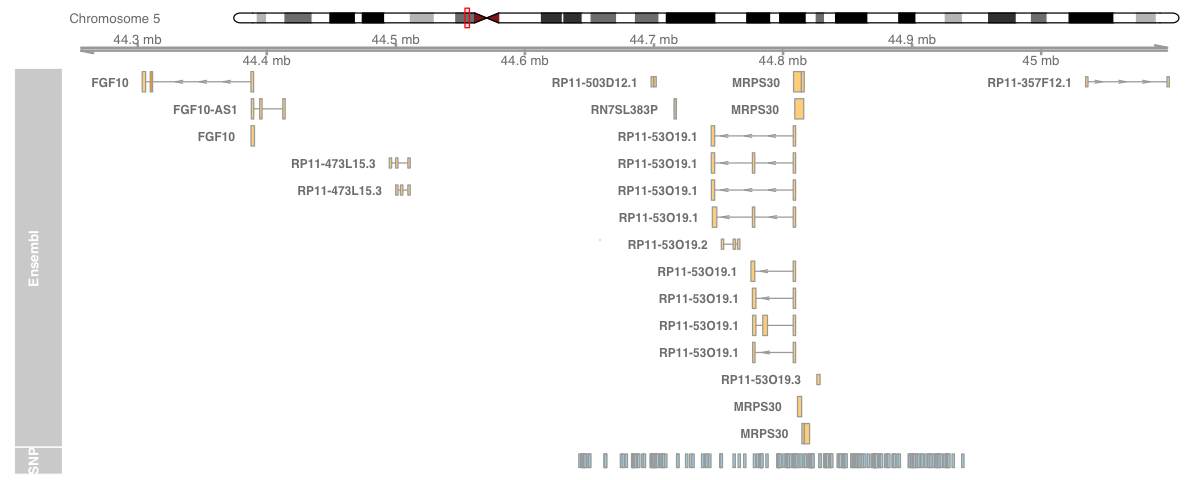

In [16]:
options(repr.plot.width=10, repr.plot.height=4)
k <- blur:::compute_mod_size(gm) %>% filter(chr == 5) %>% .$module %>% head(n = 20)
plot_snp_module(gm, k)

## Genes affected

In [17]:
table_regions(gm, net)

region,module,coords,bestSnp,genes,numSnps
3p24.1,5,27089482-27549188,rs6787882,"NEK10,SLC4A7",537 (214)
5p12,4,44642670-44939293,rs930395,"LOC100506674,MRPS30",190 (154)
10q26.13,3,123238052-123441192,rs2981579,FGFR2,206 (98)
10q24.1,1,98792520-99023546,rs2817687,"ARHGAP19-SLIT1,SLIT1",41 (0)
16q12.1,2,52521628-52587375,rs12918816,"CASC16,TOX3",59 (8)
16q12.2,2,52600447-52651714,rs12922061,CASC16,58 (7)


# GI network

In [18]:
gi <- read_tsv("cones.evo.chi2.consistency.additive.gi.tsv", 
               col_types = "ciiiccdld")
sum(gi$selected)

[1] 2227

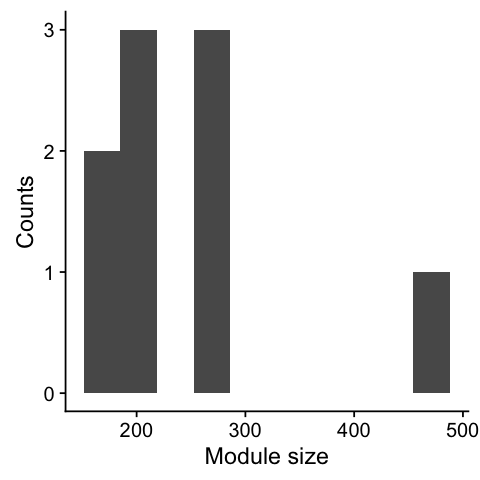

In [19]:
options(repr.plot.width=4, repr.plot.height=4)
module_size(gi)

In [20]:
head(blur:::compute_mod_size(gi))

module,chr,size,C
2,8,468,NA
7,3,286,NA
3,2,270,NA
5,5,264,NA
6,7,210,NA
8,5,200,NA


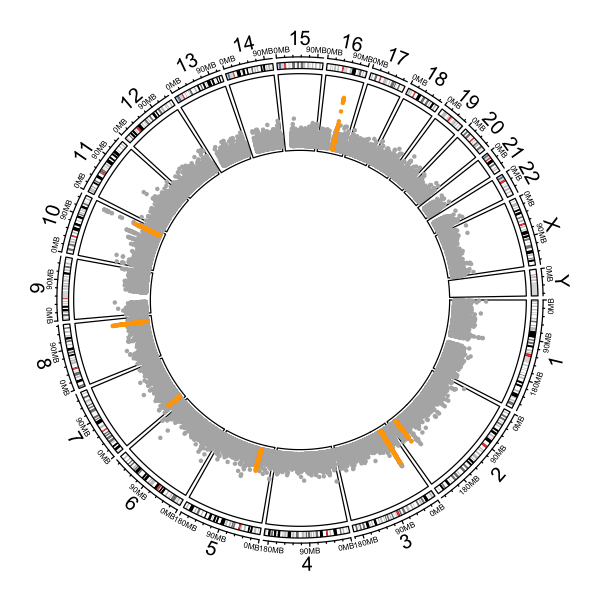

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi)

We observe how modules span through different chromosomes.

In [22]:
suppressMessages(library(ggnetwork))
library(tidygraph)
net <- left_join(net, gi, by = c("name" = "snp"))


Attaching package: 'tidygraph'

The following object is masked from 'package:stats':

    filter



Loading required package: sna
Loading required package: statnet.common

Attaching package: 'statnet.common'

The following object is masked from 'package:base':

    order

Loading required package: network
network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.

sna: Tools for Social Network Analysis
Version 2.4 created on 2016-07-23.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



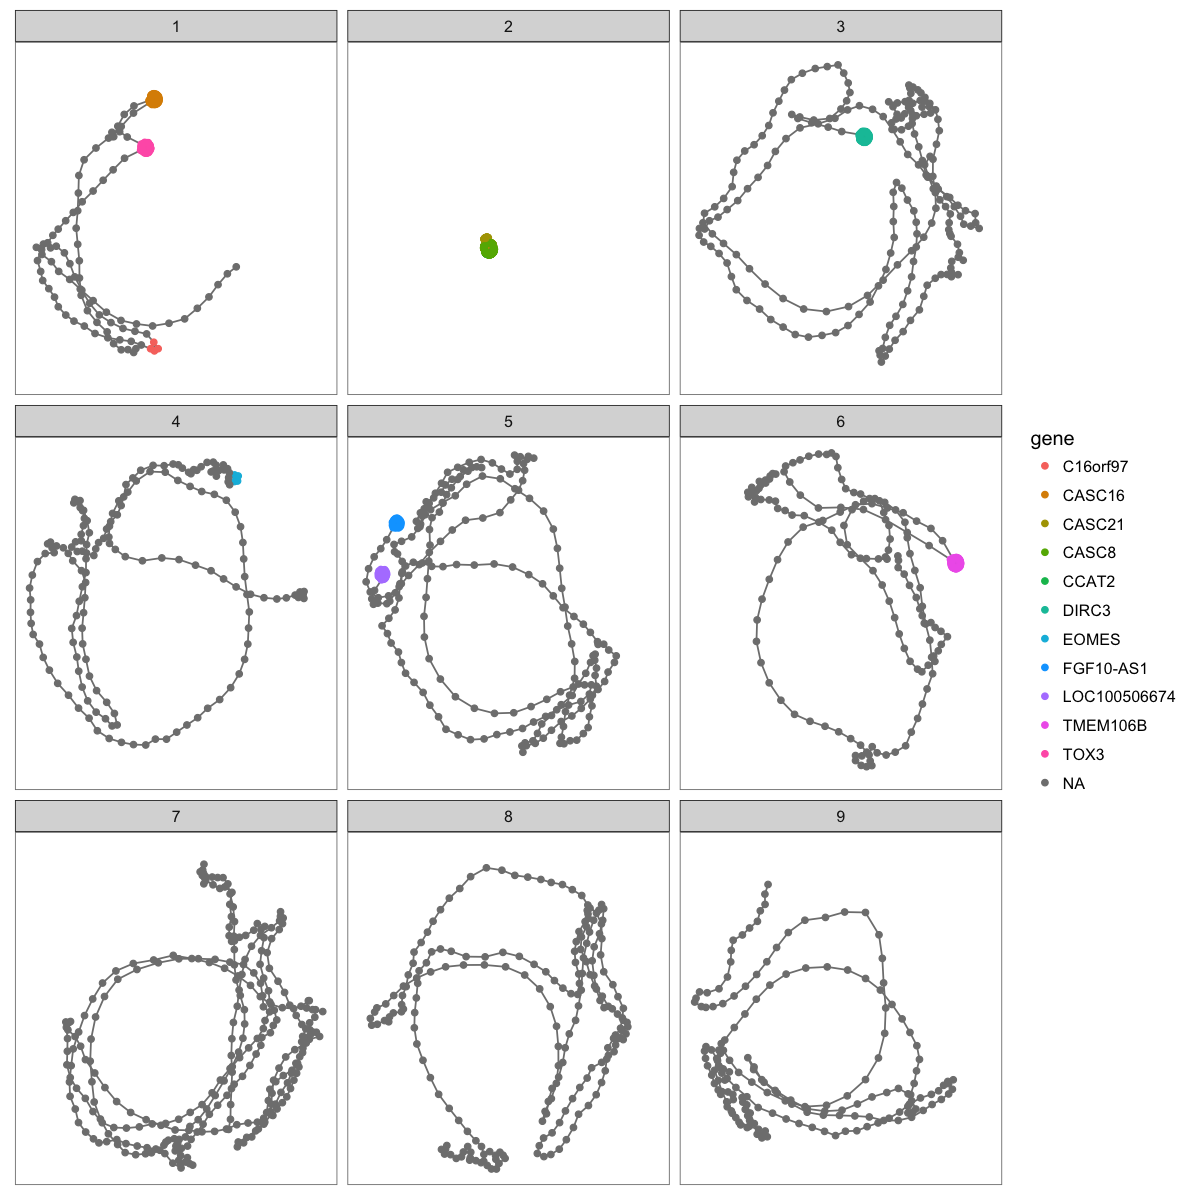

In [23]:
options(repr.plot.width=10, repr.plot.height=10)

filter(net, selected) %>%
    igraph::as.igraph() %>%
    ggnetwork %>%
    ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
        geom_edges(color = "grey50") +
        geom_nodes(aes(color = gene)) +
        facet_wrap(~module) +
        theme_facet()

## Genes affected

In [24]:
table_regions(gi, net)

region,module,coords,bestSnp,genes,numSnps
2q35,3,217861809-218606227,rs1233081,DIRC3,270 (204)
3p24.1,7,27029966-27257026,rs6551176,,286 (286)
3p24.1,4,27527732-27760524,rs388224,EOMES,165 (161)
5p12,5,44391161-44808356,rs13162191,"FGF10-AS1,LOC100506674",264 (209)
5p12,8,44816984-45188024,rs930395,,200 (200)
7p21.3,6,12195083-12324844,rs6943125,TMEM106B,210 (147)
8q24.21,2,128260183-128493983,rs9693995,"CASC21,CASC8,CCAT2",468 (0)
10q26.13,9,123358273-123493577,rs11200030,,173 (173)
16q12.1,1,51397797-52587375,rs12918816,"C16orf97,CASC16,TOX3",119 (64)
16q12.2,1,52600447-52662658,rs12922061,CASC16,72 (21)


One interesting gene that didn't pop up in previous experiments is DIRC3, associated to renal and thyroid carcinomas; the other is CCAT2, related to prostate cancer susceptibility

[1] TRUE

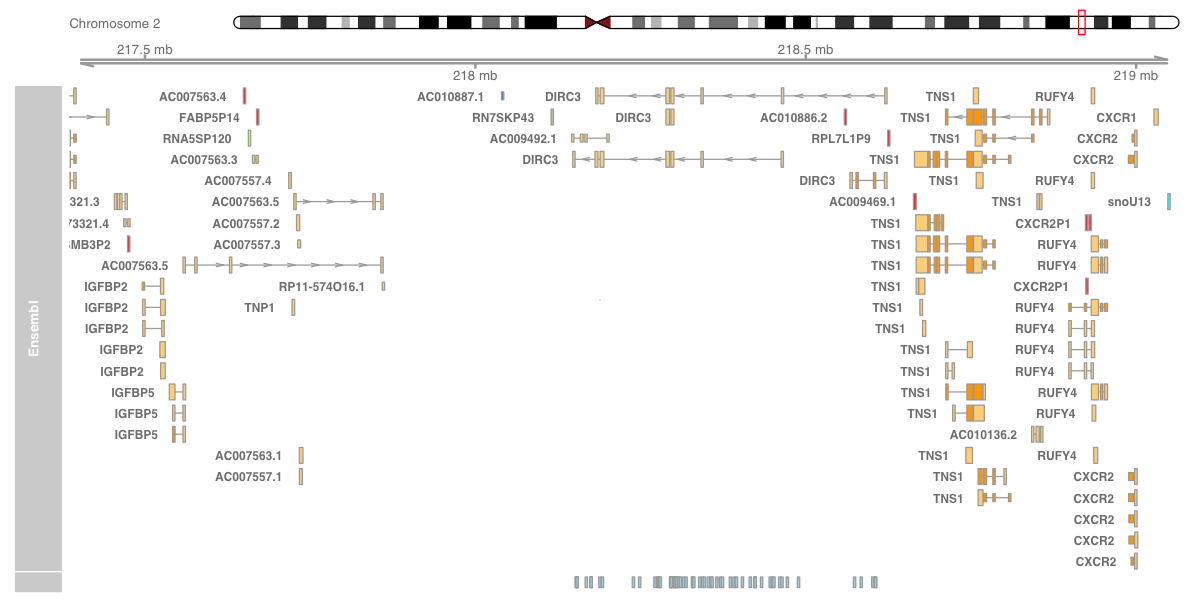

In [25]:
options(repr.plot.width=10, repr.plot.height=5)
DIRC3 <- filter(gi, selected & chr == 2 & pos > 218150948 & pos < 218606227)
plot_snp_module(DIRC3, DIRC3$module)

[1] TRUE

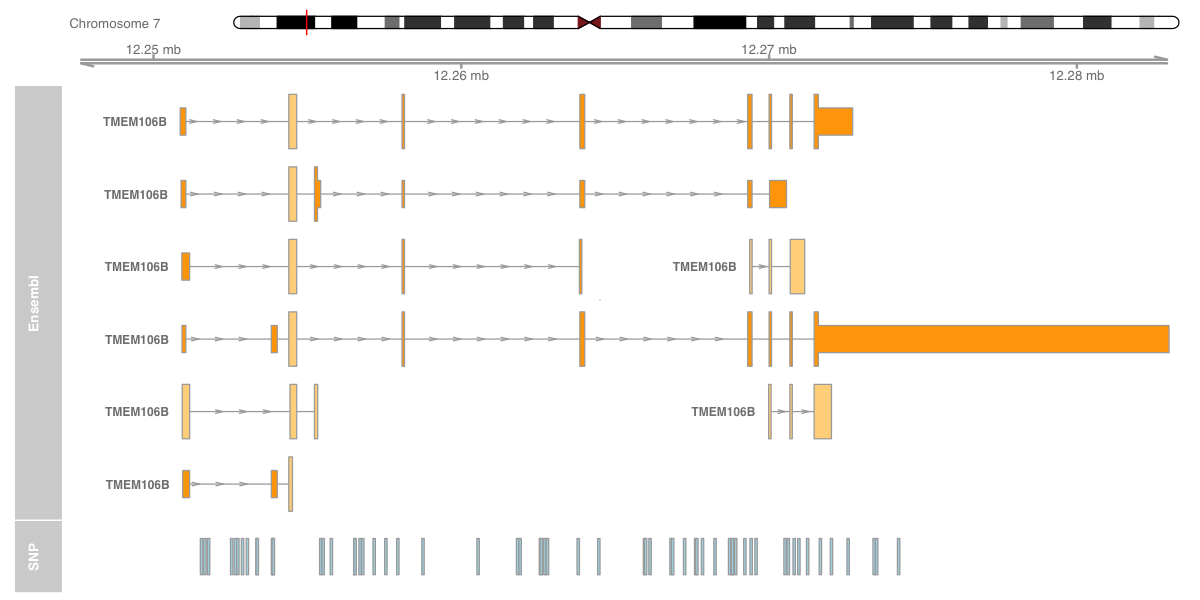

In [26]:
options(repr.plot.width=10, repr.plot.height=5)
TMEM106B <- filter(gi, selected & chr == 7 & pos > 12251488 & pos < 12275818)
plot_snp_module(TMEM106B, TMEM106B$module)

[1] TRUE

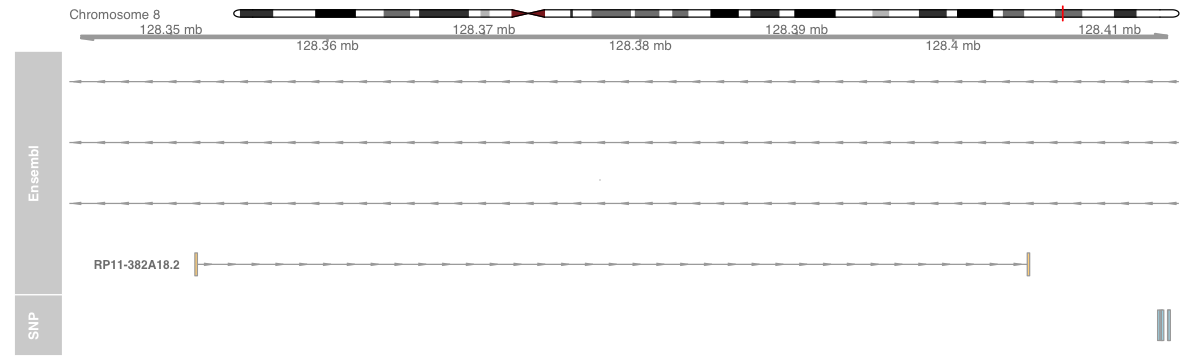

In [27]:
options(repr.plot.width=10, repr.plot.height=3)
CCAT2 <- filter(gi, selected & chr == 8 & pos > 128413087 & pos < 128414371)
plot_snp_module(CCAT2, CCAT2$module)

# GI2

GI2 refers to a network that is GI - GM + GS, or a network that contains the structural and the PPI information, but not the gene anotation. The idea behind this network is trying to enforce the impact of PPI beyond what GI network does.

In [28]:
gi2 <- read_tsv("cones.evo.chi2.consistency.additive.gi2.8484771.tsv", 
                col_types = "ciiiccdld")
sum(gi2$selected)

[1] 337

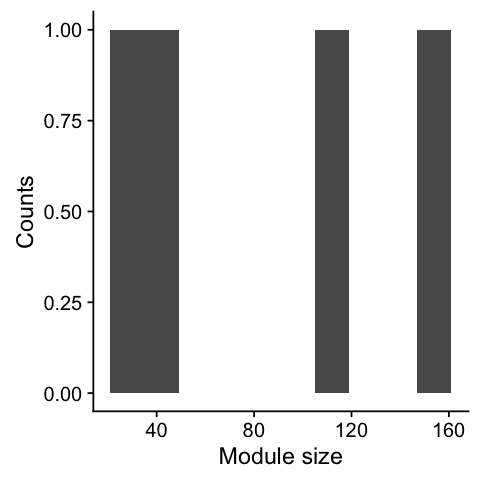

In [29]:
options(repr.plot.width=4, repr.plot.height=4)
module_size(gi2)

We find a few big clusters, which is encouraging.

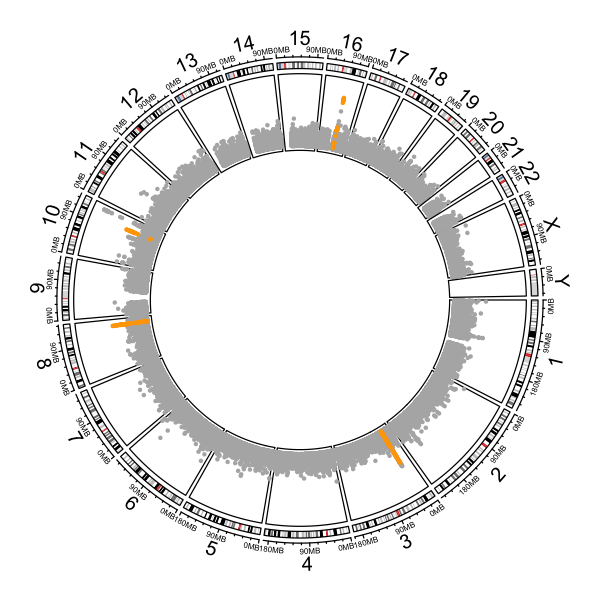

In [30]:
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi2)

Nonetheless, the SNPs are not connected to each other, so we are still not enforcing the PPI aspect of the network.

# Consistency

How consistent are the selected SNPs in the different networks?

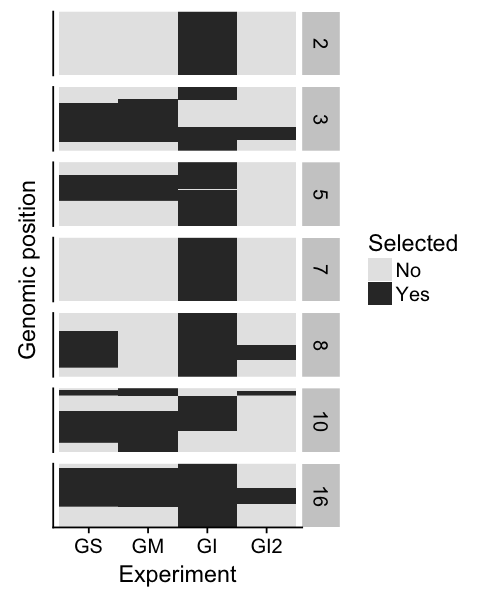

In [31]:
options(repr.plot.width=4, repr.plot.height=5)
consistency(GS = gs, GM = gm, GI = gi, GI2 = gi2)

GI network selects twice as many SNPs as the GM and the GS networks. As we see, most of the SNPs selected in the GS are selected in GS, and most of the ones selected in GM (+ many more) are selected in GI. Interestingly, as we can see from the circos above, GI network provides a way of connecting the previously isolated chromosomic regions in 3, 5 and 8 (and some potentially interesting regions in chromosomes 10 and 16).

In [32]:
set_gs <- gs$snp[gs$selected]
set_gm <- gm$snp[gm$selected]
set_gi <- gi$snp[gi$selected]

length(intersect(set_gs, set_gm))/length(union(set_gs, set_gm))
length(intersect(set_gi, set_gs))/length(union(set_gi, set_gs))
length(intersect(set_gi, set_gm))/length(union(set_gi, set_gm))

[1] 0.7160675

[1] 0.3263359

[1] 0.2243542

# Pruned

The pruned dataset refers to GENESIS without SNPs in high LD i.e. SNPs with a R<sup>2</sup> >= 0.8. I analyzed this dataset in identical conditions as the previous i.e. χ<sup>2</sup> and consistency. However, the results (not shown, available at "cones.evo.chi2.consistency.additive.g\*.pruned.tsv)" were quite disapointing: only spartsity is enforced and the same block of 2686 SNPs with a p-value higher than some value are selected in all the networks. In consequence, I decided to run SConES using the SKAT score and conssitency, as this data is more similar to the data originally analyzed by Chloé in the SConES paper.

In [33]:
gs_pruned <- read_tsv("cones.evo.skat.consistency.additive.gs.pruned.tsv", 
                      col_types = "ciiiccdld")
gm_pruned <- read_tsv("cones.evo.skat.consistency.additive.gm.pruned.tsv", 
                      col_types = "ciiiccdld")
gi_pruned <- read_tsv("cones.evo.skat.consistency.additive.gi.pruned.tsv", 
                      col_types = "ciiiccdld")
gi2_pruned <- read_tsv("cones.evo.skat.consistency.additive.gi2.pruned.tsv", 
                      col_types = "ciiiccdld")

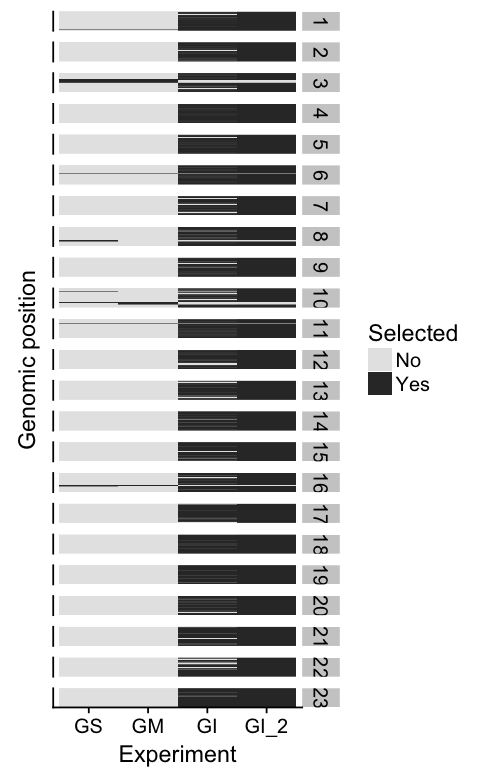

In [34]:
options(repr.plot.width=4, repr.plot.height=6.5)
consistency(GS = gs_pruned, GM = gm_pruned, GI = gi_pruned, GI_2 = gi2_pruned)

Clearly the GI\* networks have go overboard, with solutions that exceed 7,000 SNPs. GM network looks more reasonable.

[1] 275

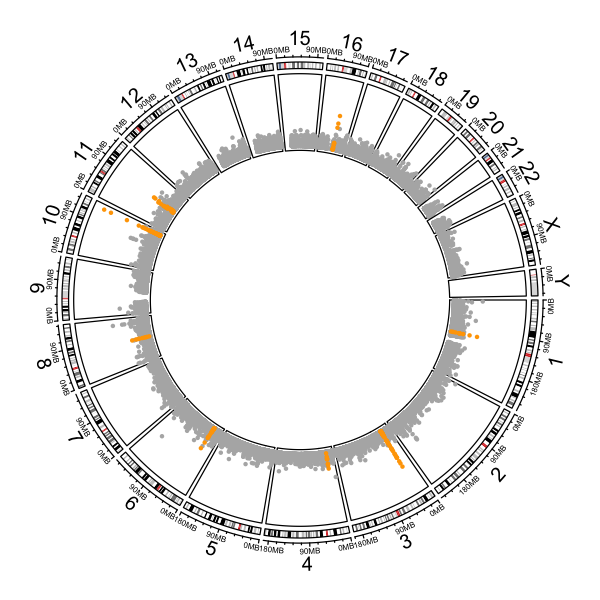

In [35]:
sum(gm_pruned$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gm_pruned)

In [36]:
table_regions(gm_pruned, net)

region,module,coords,bestSnp,genes,numSnps
1p13.3,7,108538626-108655288,rs12145813,,13 (13)
3p24.1,5,27038340-27562988,rs6779140,"NEK10,SLC4A7",101 (54)
4p15.2,8,22030668-22174771,rs4626188,,10 (10)
6p21.33,4,31675765-31824828,rs1043618,"DDAH2,LY6G6C,MSH5-SAPCD1,MSH5,SAPCD1",22 (10)
8q21.11,2,76106596-76247693,rs1382665,CASC9,11 (2)
10q26.13,3,123238052-123358273,rs2912780,FGFR2,68 (1)
11q13.3,9,69307444-69328512,rs662169,,19 (19)
11q13.4,6,73356872-73720165,rs2075577,"MRPL48,PAAF1,RAB6A,UCP3,PLEKHB1",13 (4)
16q12.1,1,52581979-52587375,rs3095604,CASC16,3 (2)
16q12.2,1,52600447-52651714,rs12922061,CASC16,15 (4)


We are hitting some clusters at new locations, like CASC9 and MSH5.

# Filtering out intergenic SNPs

## Only BioGRID genes

In [37]:
gi_dm <- read_tsv("cones.evo.chi2.consistency.additive.gi.biogrid_pruned.dmgwas-like.tsv", 
                      col_types = "ciiiccdld")

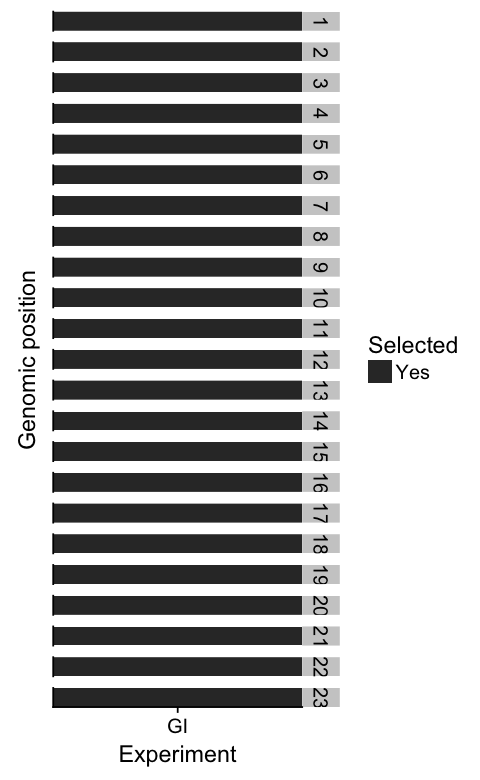

In [38]:
options(repr.plot.width=4, repr.plot.height=6.5)
consistency(GI = gi_dm)

[1] 1350

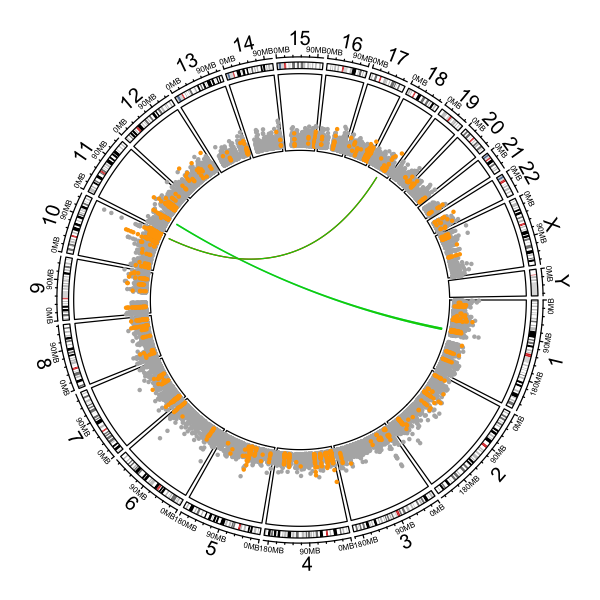

In [39]:
sum(gi_dm$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi_dm)

In [40]:
table_regions(gi_dm, net) %>%
    filter(numSnps > 5)

region,module,coords,bestSnp,genes,numSnps
1q32.1,113,205884274-205908867,rs7367849,SLC26A9,8 (0)
1p36.12,5,21840129-21892479,rs869179,ALPL,7 (0)
1p32.1,35,60367240-60391946,rs3754205,CYP2J2,6 (0)
2q12.2,137,106714317-106802805,rs11685300,UXS1,6 (0)
3q27.1,73,182905808-183109397,rs10937123,MCF2L2,5 (0)
3p21.31,118,45796951-45810094,rs2251109,SLC6A20,6 (0)
4p15.2,107,25813070-25863375,rs6831024,SEL1L3,5 (0)
5p15.2,37,10683822-10743929,rs3797111,DAP,5 (0)
5q12.1,18,60937964-61002359,rs432733,C5orf64,7 (0)
6p21.33,16,31869673-31912009,rs3130683,C2,7 (0)


## Only ACSN genes

I performed analyses using the ACSN network and all the SNPs. These analyses are available, for both GI and GI2 at cones.evo.chi2.consistency.additive.ascn.gi{2}.4546781.tsv. However, the interest of ACSN might be just zooming in in the mechanisms relevant for cancer. In consequence, the analyses I am displaying here involve exclusively the SNPs that we can map to a gene included in the ACSN.

In [41]:
gi_acsn <- read_tsv("cones.evo.chi2.consistency.additive.gi.acsn_pruned.dmgwas-like.tsv", 
                      col_types = "ciiiccdld")

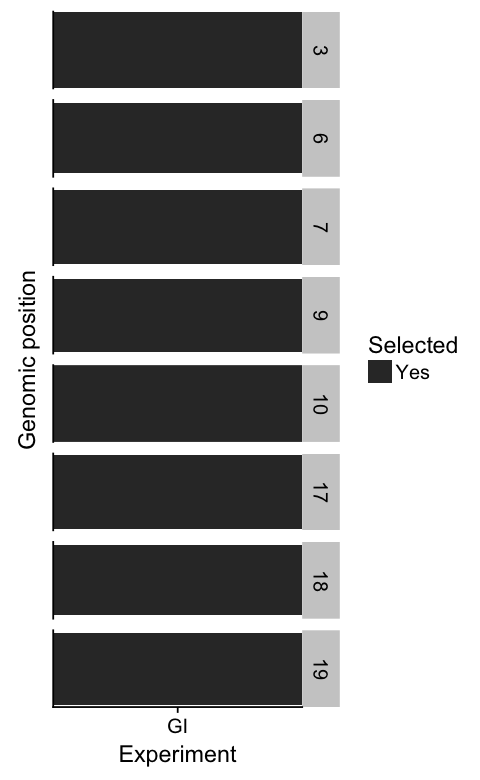

In [42]:
options(repr.plot.width=4, repr.plot.height=6.5)
consistency(GI = gi_acsn)

[1] 23

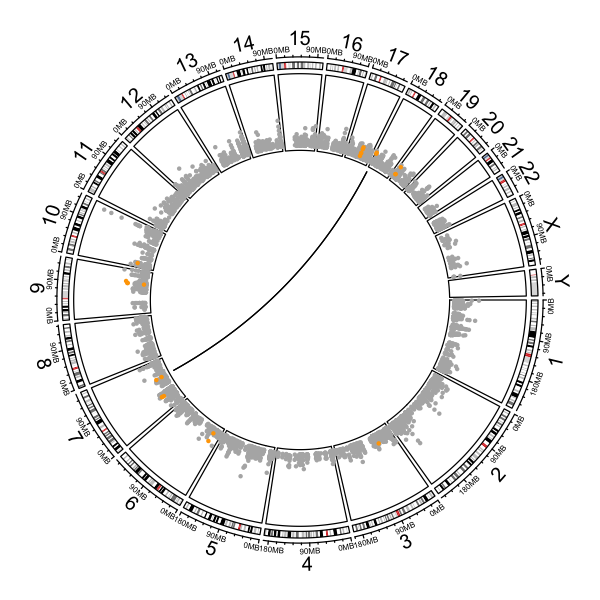

In [43]:
sum(gi_acsn$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi_acsn)

In [44]:
table_regions(gi_acsn, net)

region,module,coords,bestSnp,genes,numSnps
3p21.1,7,53269087-53269087,rs17052920,TKT,1 (0)
6p22.3,1,24667323-24667586,rs17243143,ACOT13,2 (0)
7q22.1,5,101256833-101267435,rs2240389,MYL10,2 (0)
7p13,2,44747903-44747903,rs14239,OGDH,1 (0)
7p12.3,2,45684544-45684974,rs1357111,ADCY1,2 (0)
9q31.1,4,103011587-103011587,rs16919019,INVS,1 (0)
9q22.32,3,97328175-97349591,rs2280301,FBP2,3 (0)
10p13,9,13233867-13233867,rs2274108,MCM10,1 (0)
17q21.33,6,48172779-48187669,rs4794096,PDK2,5 (0)
18p11.31,5,3263391-3268699,rs9947947,MYL12B,2 (0)


# LD-corrected network

The LD corrected network introduces LD information in the edges. Fundamentally, SNPs in LD > 0.7 are connected by edges with weight ~ 0; for SNPs with LD < 0.5 it is ~ 1.

## GI

In [45]:
gi_ld <- read_tsv("cones.evo.chi2.consistency.additive.LD.gi.4546781.tsv", 
                   col_types = "ciiiccdld")

[1] 344

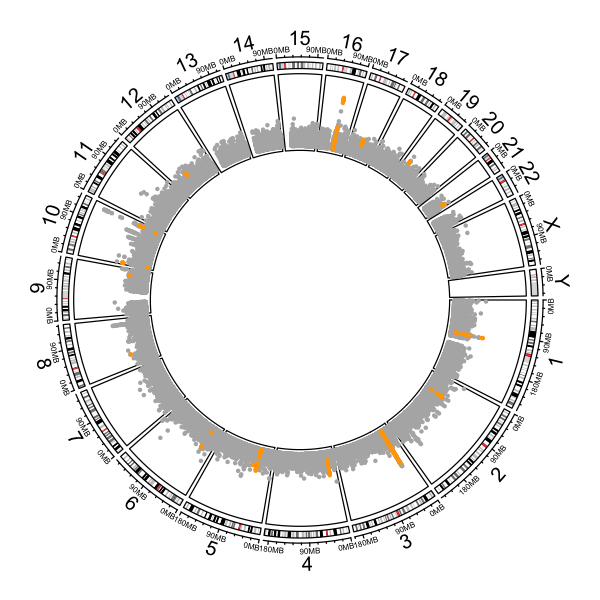

In [46]:
sum(gi_ld$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi_ld)

### Affected genes

In [47]:
table_regions(gi_ld, net)

region,module,coords,bestSnp,genes,numSnps
1p13.3,2,108568922-108607571,rs12145813,,12 (12)
2p16.1,3,57267524-57363736,rs1593236,,13 (13)
3p24.1,4,27054003-27056382,rs66479150,,8 (8)
3p24.1,5,27116735-27145591,rs17434131,,33 (33)
3p24.1,6,27183444-27231719,rs6551176,,41 (41)
3p24.1,7,27234968-27236734,rs6551179,,4 (4)
3p24.1,8,27237435-27242153,rs10049490,,4 (4)
3p24.1,9,27244442-27250891,rs4973756,,27 (27)
3p24.1,10,27542500-27543655,rs711737,,2 (2)
4p15.2,11,22080362-22109914,rs4626188,,14 (14)


## GI2

In [48]:
gi2_ld <- read_tsv("cones.evo.chi2.consistency.additive.LD.gi2.4546781.tsv", 
                   col_types = "ciiiccdld")

[1] 479

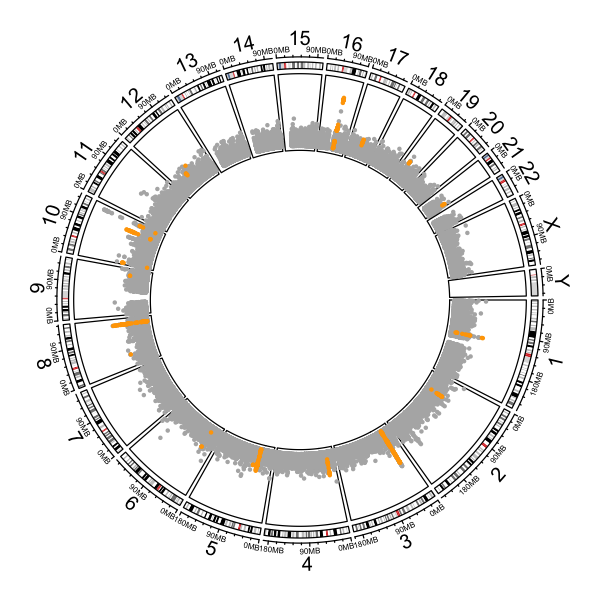

In [49]:
sum(gi2_ld$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(gi2_ld)

### Affected genes

In [50]:
table_regions(gi2_ld, net)

region,module,coords,bestSnp,genes,numSnps
1p13.3,7,108568922-108607571,rs12145813,,12 (12)
2p16.1,8,57267524-57363736,rs1593236,,13 (13)
3p24.1,9,27054003-27056382,rs66479150,,8 (8)
3p24.1,10,27116735-27145591,rs17434131,,33 (33)
3p24.1,11,27183444-27231719,rs6551176,,41 (41)
3p24.1,12,27234968-27236734,rs6551179,,4 (4)
3p24.1,13,27237435-27242153,rs10049490,,4 (4)
3p24.1,14,27244442-27250891,rs4973756,,27 (27)
3p24.1,15,27542500-27543655,rs711737,,2 (2)
4p15.2,16,22080362-22109914,rs4626188,,14 (14)


# VEGAS + PPI

We used the VEGAS output to create a one SNP per gene experiment. Then, we used only BioGRID protein-protein interaction network to interconnect them. The results are the following:

In [51]:
vegas <- read_tsv('cones.evo.chi2.consistency.additive.ppi.vegas.tsv',
                  col_types = "ciiiccdld")

[1] 655

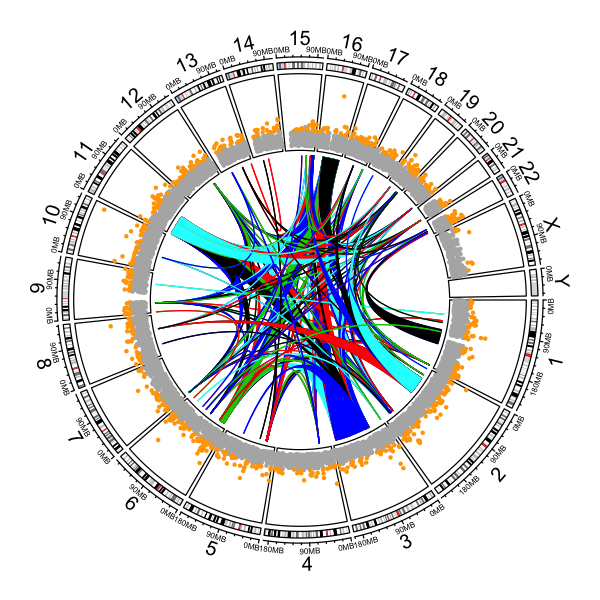

In [52]:
sum(vegas$selected)
options(repr.plot.width=5, repr.plot.height=5)
plot_ideogram(vegas)

Beautiful as it looks, we are only doing a glorified Bonferroni correction. Maybe some other combination of hyperparameters would retrieve the expected results...